In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
#Acceleration in y direction
def dvy(C, vy):
    if(vy > 0):
        return -981-C*vy**2 
    if(vy <= 0):
        return -981+C*vy**2
    #Had to add if statements here so that the drag is working against the velocity always

#Acceleration in x direction
def dvx(C, vx):
    if(vx > 0):
        return -C*vx**2 
    if(vx <= 0):
        return C*vx**2


Time to make the grid

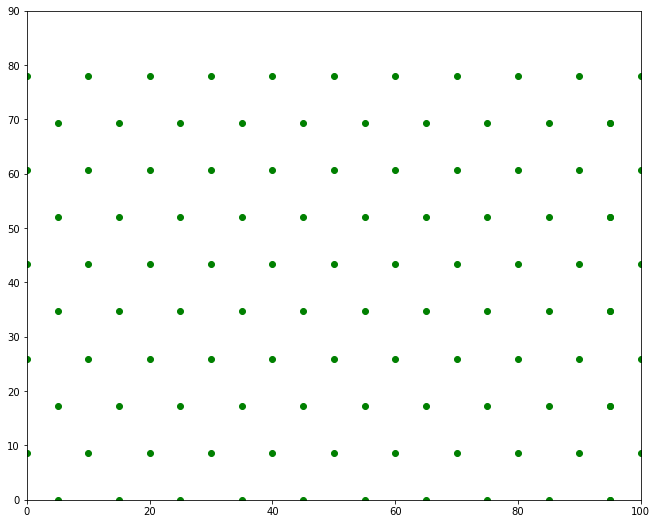

In [4]:
#Array for peg positioning along x axis
xPegs = np.ones((10,11))

#Do one double loop for odd numbered rows
for i in range(1,10,2):
    for j in range(11):
        xPegs[i,j] = j*10
        
#Now we do one for even numbered rows
for i in range(0,10,2):
    for j in range(10):
        xPegs[i,j] = j*10 + 5
        xPegs[i,10] = 95 
        #Slight adjustment for the odd number rows, just repeating 95 twice instead of going to 105
        #shouldn't make a difference in the long run 
        
#Now we create the array for the y positioning of the pegs, with a constant distance of 8.66cm in between
yPegs = np.ones((10,11))
for i in range(10):
    yPegs[i,:] =  8.66*i

#Plot the two together to create the image of the pegs
plt.plot(xPegs,yPegs, 'o', color = 'g')

plt.xlim(0,100)
plt.ylim(0,90)
plt.show()
#x and y limits to make the figure look more like the board


#This is here to make the rest of the figures nice and easy to see
plt.rcParams['figure.figsize']= [11,9] 

Time to test some bouncing mechanics

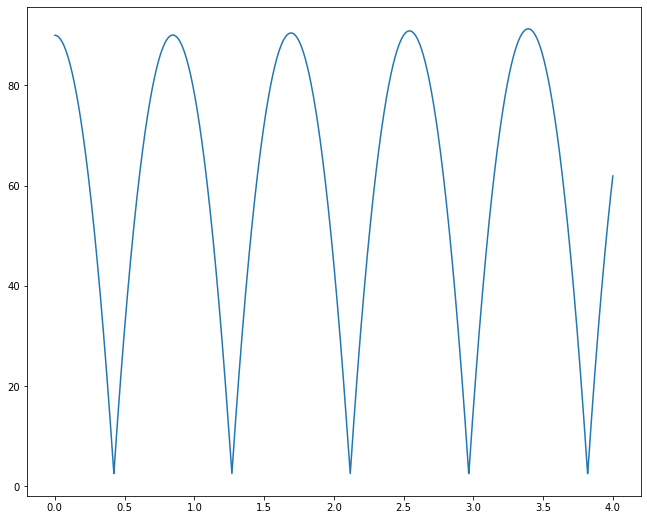

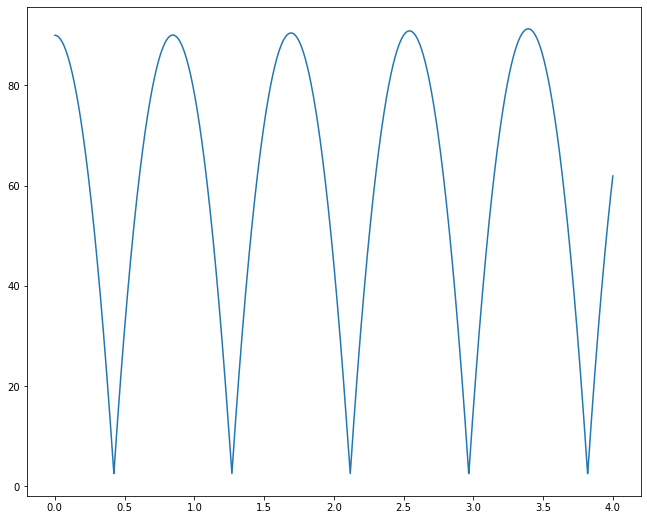

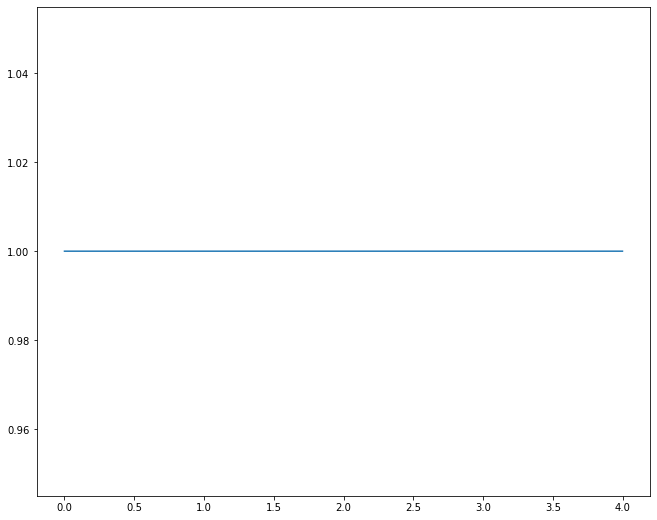

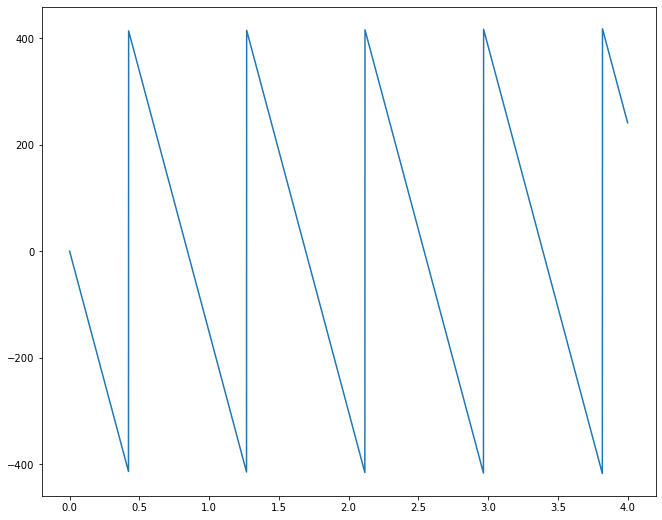

In [5]:
def BallMechanics(xi, vxi, yi, vyi, time, C): #Taking initial x and y position, as well as velocities, the total runtime
                                       #and the drag as our function variables
        
        h = 0.001 #This is the step size given
        N = int(time/0.001) #the total number of points 
        t = np.arange(0,time,h)
        
        xpos = np.zeros(N) 
        ypos = np.zeros(N)
        xvel = np.zeros(N)
        yvel = np.zeros(N) #Creating a whole bunch of arrays for positions and velocity
        
        xpos[0] = xi #The initial values of the array
        ypos[0] = yi
        xvel[0] = vxi
        yvel[0] = vyi
        
        
        xpos[1] = xpos[0] + h*xvel[0] 
        ypos[1] = ypos[0] + h*yvel[0]
        xvel[1] = xvel[0] + h*dvx(C,xvel[0]) 
        yvel[1] = yvel[0] + h*dvy(C,yvel[0])
        
        for i in range(1,N-1):
            
            xpos[i+1] = xpos[i] + h*xvel[i]
            ypos[i+1] = ypos[i] + h*yvel[i] #This iterates through to find the next position using the last position 
                                            #and the velocity
            
            if(ypos[i+1] <= 2.5): #This makes sure the ball is always above 0
                                #because the ball is radius 2.5 and we're plotting the center of it
                ypos[i+1] = 2.5
                yvel[i+1] = -(yvel[i])
        
            else:
                yvel[i+1] = yvel[i] + h*dvy(C, yvel[i])
            
            xvel[i+1] = xvel[i] + h*dvx(C, xvel[i])
            
            #print(yvel[i],ypos[i])
            #print(xvel[i])
            
        plt.plot(xpos,ypos)
        plt.show()
        plt.plot(t,ypos)
        plt.show()
        plt.plot(t,xvel)
        plt.show()
        plt.plot(t,yvel)
        plt.show()
        
BallMechanics(0,1,90,0,4,0)

We gonna build a collision function

In [6]:
def Collision(xin,yin,vxin,vyin):
    if (xin==0): 
        theta=np.pi/2
    else: 
        theta = np.arctan(yin/xin)
    M = np.array([[np.cos(2*theta),np.sin(2*theta)],[np.sin(2*theta),-np.cos(2*theta)]])
    pos_in = np.array([-vxin,-vyin])
    
    pos_out = np.linalg.solve(M, pos_in) 
    
    return pos_out[0],pos_out[1]

Collision(1,1,5,5)

(-5.0, -5.0)

Okay, now we stole the differential equations from the ball mechanics function above and put them down below, but this time around we added the peg positioning and made it iterate through the positioning every single time to find if the ball is within the collision distance of 0.5 + 2.5 cm and also check the collision condition for the wall where its either below 2.5 or above 97.5 cm for the x position. When these conditions are met the collision function is called, and then it continues on and these conditions are checked every time

The ball landed in bin 6


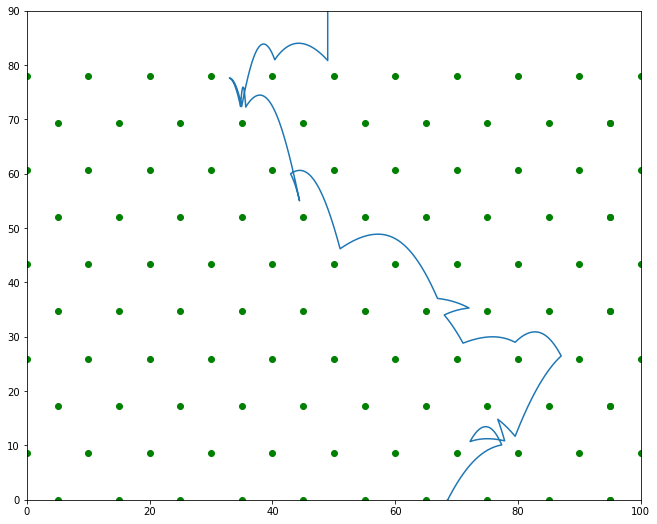

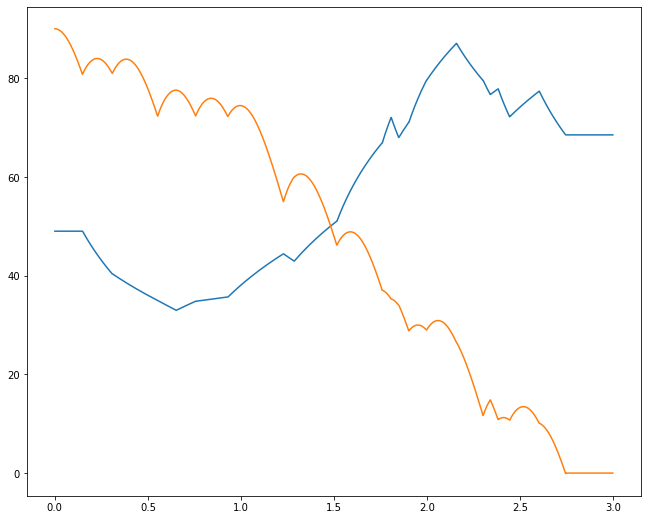

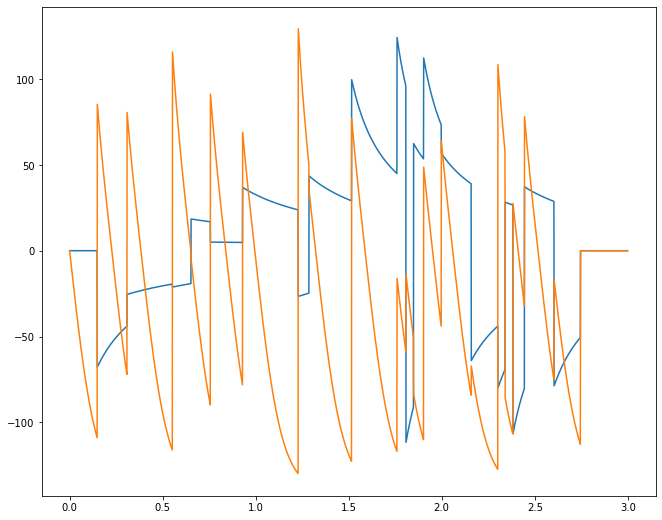

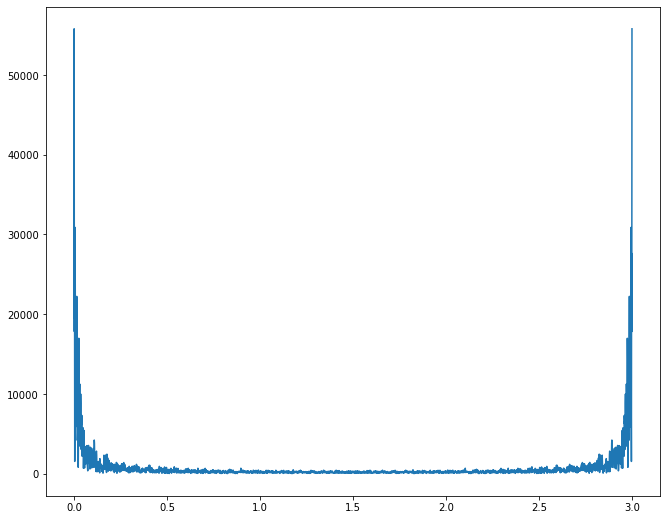

In [15]:
def Plinko(xstart, time, C): #Taking initial x and y position, as well as velocities, the total runtime
                                       #and the drag as our function variables
        
        h = 0.001 #This is the step size given
        N = int(time/0.001) #the total number of points 
        t = np.arange(0,time,h)
        
        xpos = np.zeros(N) 
        ypos = np.zeros(N)
        xvel = np.zeros(N)
        yvel = np.zeros(N) #Creating a whole bunch of arrays for positions and velocity
        
        xpos[0] = xstart #The initial values of the array
        ypos[0] = 90
        xvel[0] = 0
        yvel[0] = 0
        
        
        xpos[1] = xpos[0] + h*xvel[0] 
        ypos[1] = ypos[0] + h*yvel[0]
        xvel[1] = xvel[0] + h*dvx(C,xvel[0]) 
        yvel[1] = yvel[0] + h*dvy(C,yvel[0])
        
        for i in range(1,N-1):
            dist = 4
            xpos[i+1] = xpos[i] + h*xvel[i]
            ypos[i+1] = ypos[i] + h*yvel[i] #This iterates through to find the next position using the last position 
                                          #and the velocity
            
            for y in range(10):
            #So this is where the new stuff comes in
                
                if(abs(y*8.66-ypos[i+1]) <= 4.33):
                    #Here we check for the closest y positioning of the peg by dividing 8.66 by 2 and iterating 
                    #through the y positions to find the right one
                    
                    closestyPeg = y*8.66
                    #Then we set this variable as the y component of the peg
                    
                    if(y%2 == 0):
                        #Now we have to check if this is an even or odd row of the pegs because they have different
                        #x positioning
                    
                        for x in range(10):
                            #This happens if it's even and the x values are 10,20,30 etc...
                            if (abs(x*10+5-xpos[i+1]) <= 5): #This checks the closest x component of the peg
                                closestxPeg = x*10 + 5
                                dist = np.sqrt((closestxPeg-xpos[i+1])**2+(closestyPeg-ypos[i+1])**2) 
                                #This is the distance using the hypotenuse of the difference of x and y position
                                #and the x and y component of the peg
                                break
                                
                    if(y%2 == 1):
                        
                        for x in range(10):
                            #This happens if it's odd and the x values are 5,15,25, etc...
                            if (abs(x*10 - xpos[i+1]) <= 5):
                                closestxPeg = x*10 #Same idea as stated in the even 
                                dist = np.sqrt((closestxPeg-xpos[i+1])**2+(closestyPeg-ypos[i+1])**2)
                                break
                    break
            
            if(xpos[i] <= 2.5):
                    #Now we have to put in the wall boundaries 
                    
                    xvel[i+1]= -xvel[i]
                    #If it hits the wall the x component is reversed and the y component stays exactly the same
                    yvel[i+1] = yvel[i] + h*dvy(C, yvel[i])

                    xpos[i+1] = 2.5000001 
                    #We have to slightly adjust the x positioning or it will get stuck in this condition for ever
                    ypos[i+1] = ypos[i]

                
            elif(xpos[i] >= 97.5):
                    #This is the other wall at 100-2.5
                    
                    xvel[i+1]= -xvel[i]
                    #Exactly the same as the other side of the wall
                    yvel[i+1] = yvel[i] + h*dvy(C, yvel[i])

                    xpos[i+1] = 97.499999
                    ypos[i+1] = ypos[i]
                
            elif(dist <= 3):
                #If the distance from the center of the ball to the center of the peg is within 3cm as calculated
                #in the double for loops above then do this 
                vxout, vyout = Collision(xpos[i]-closestxPeg,ypos[i]-closestyPeg,xvel[i],yvel[i])
                #Now we call our collision function with the difference between x and y positions being the parameters
                #required to calculate theta
                
                xvel[i+1]= vxout
                yvel[i+1]= vyout
               
                xpos[i+1] = xpos[i]
                ypos[i+1] = ypos[i]
                
            else:
                #This is the case that happens if none of the other conditions are true, it simply uses the 
                #differential equations from the ball mechanics function
                yvel[i+1] = yvel[i] + h*dvy(C, yvel[i])
                xvel[i+1] = xvel[i] + h*dvx(C, xvel[i])
            #print(xpos[i])
            #print(yvel[i],ypos[i])
            #print(xvel[i])
            if (ypos[i+1] < 0):
                bin = int(xpos[i+1]/10)
                if(xpos[i+1] > 95):
                    bin = 0
                for j in range((i+2),N):
                    xpos[j] = xpos[i+1]
                    
                break
            if (xpos[i+1] < 0):
                xpos[i+1] = 2.5
            if (xpos[i+1] > 100):
                xpos[i+1] = 97.5
       
        plt.plot(xpos,ypos)
        print("The ball landed in bin",bin)
        
        freq = np.fft.fft(xvel)
        
       
        plt.plot(xPegs,yPegs, 'o', color = 'g')
        plt.xlim(0,100)
        plt.ylim(0,90)
        plt.show()
        
        plt.plot(t,xpos)
        plt.plot(t,ypos)
        plt.show()
        plt.plot(t,xvel)
        plt.plot(t,yvel)
        plt.show()
        plt.plot(t,abs(freq))
        #plt.xlim(1,210)
Plinko(49,3,0.05)